# Project: Data Wrangling - We Rate Dogs

In [1]:
# Load the library necessary for the analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt, mpld3
import matplotlib.patches as mpatches
import plotly.express as px

%matplotlib inline

In [2]:
# Loading the first dataset

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# View the first few lines of twitter archive for "WeRateDogs"

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Loading the second part of data

import requests
import os

image_folder = 'Image_prediction'
if not os.path.exists(image_folder):
    os.makedirs(image_folder)

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image_data = requests.get(url)

with open(os.path.join(image_folder, url.split('/')[-1]), mode='wb') as f:
    f.write(image_data.content)


In [5]:
# Loading the second data as a dataframe

image_prediction = pd.read_csv(r"C:\Users\Samuel Chika\Documents\Nanodegree\Data Wrangling\Project\Image_prediction\image-predictions.tsv", sep = '\t')

In [6]:
# View the top rows of second data

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Getting the third data

import json

tweet_list = []
with open('tweet-json.txt') as f:
    for data in f:
        tweet = json.loads(data)
        key = tweet.keys()
        user = tweet.get('user')
        id_str = tweet.get('id_str')
        retweet_count = tweet.get('retweet_count')
        favorite_count = tweet.get('favorite_count')
        tweet_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [8]:
# Load third data into dataframe

tweet_data_count = pd.DataFrame(tweet_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [9]:
# Inspect the top rows of third dataframe

tweet_data_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Now, data from all thre data sources have been read into a data frame. It is now time to start analysis of the data and performing all necessary cleaning. 
Hence, we begin with the data in "twitter_archive" ...

In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# Assess some basic info about each column in the dataset

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# View summary of the numerical variables in the data

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Accooring to the instructions given for this project, retweets are not to be considered. Therefore, the tweets listed above are retweets, and they representa group of tweets that we will not be using in our analysis. 

In [13]:
# View the number of rows and columns in the data

twitter_archive.shape

(2356, 17)

In [14]:
# Insoect the first few rows of the second data

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
# Insoect first few rows of third data

tweet_data_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
# View number of rows and columns in thrird data

tweet_data_count.shape

(2354, 3)

In [17]:
# View information about the columns in the third data

tweet_data_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


Instruction given for the project indicates that we are expected to highlight at least 8 data quality issues and 2 data tidiness issues.

## Quality

### The following observations were made from data in the Twitter Archive 

 - The column name "id_str" does not match with any other column in the other tables. This column name needs to be changed to "tweet_id".
 - Some of the columns in the table contain missing values. Some of the affected columns are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, etc.
 - The data type of the tweet_id is integer, but needs should be an object.
 - The table contains both retweets and replies, but since the instruction specifically states that only original tweets are allowed, these would have to be removed. 
 - The datatype of the timestamp needs to be changed to "datetime".
 - The dog names are not in capital letters since they are nouns.
 - There are lots of columns with 'none' as the entry.

### Under the image preditions data, issues observed includes

 - The format of the names in columns p1, p2 and p3 are not consistent, the names starts with a mixture of both capital and small letters, which should be corrected. 


## Tidiness

 - The data in all the tables must be combined to form just one table.
 - Some of the tweets represents more than one dog. 
 - The column representing texts contains multiple information such as urls and even ratings.

In [18]:
# View how many times a name appeared in the "name" column

twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

From the overview of the result above, it is observed that there are 745 cases in which the name of the dog was "none". We can also see that "a" occured 55 times. These two point to the fact that soxme of the names in that column are not accurate.

In [19]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


As suspected, we can see that "none" and 'a" are duplicated severally under the column "name".

In [20]:
# View frequency of each value in rating_numerator

twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

The result above shows the frequency of each value in the numerator column and it indicates that there are some outliers in that column. While majoity of values zfall between 8 and 12, we can also see that we have values like 1776, 666,420, etc in the column.

In [21]:
# View frequency of each value in rating_denominator

twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Similar to the numerator, it can be seen from the result above that the denominator also has also has some outliers. While 10 is the overwhelming majortiy, we still have some large values like 120, 150 and 170.

In [22]:
# View last few rows in this data

image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image_prediction.shape

(2075, 12)

In [24]:
# View basic information about each column in this data

image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The result above hints at the fact that there are no missing values in this dataframe. 

In [25]:
# View frequency of each value in "p1" column

image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [26]:
# View frequency of each value in "p2" column

image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [27]:
# View frequency of each value in "p3" column

image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

The results above indicate that Labrodor Retriever and Golden Retriever are two of the most popular dog breeds in our dataset.

In [28]:
# View last few rows in this data

tweet_data_count.tail()

,id_str,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [29]:
# View number of rows and columns in this data

tweet_data_count.shape

(2354, 3)

In [30]:
tweet_data_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [31]:
# View summary of numerial columns in this data

tweet_data_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


# DATA CLEANING

Now that we have examined the different dataset, we need to clean the data. However, we would first duplicate each dataset so that we have a backup just in case something goes wrong.

In [32]:
# Make a copy of each of these data

clean_twitter_archive = twitter_archive.copy()
clean_image_prediction = image_prediction.copy()
clean_tweet_data_count = tweet_data_count.copy()

Now that the tables are duplicated, we would start cleaning them one after another, starting with the "Clean Twitter Archive".

In [33]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

To start with, we are going to remove all retweets and replies so as to ensure only original tweets are left as instructed.

## Define

Remove all retweets and replies leaving only original tweets in the data

## Code

In [34]:
# Removing the retweets in the dataset

remove_retweet = clean_twitter_archive[pd.notnull(clean_twitter_archive['retweeted_status_id'])].index
clean_twitter_archive.drop(index=remove_retweet, inplace=True)

In [35]:
# Removing replies from the dataset

remove_reply = clean_twitter_archive[pd.notnull(clean_twitter_archive['in_reply_to_status_id'])].index
clean_twitter_archive.drop(index=remove_reply, inplace=True)

## Test

In [36]:
# Checking to ensure the codes above worked as expected

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

From the output above, we can see some columns are now empty, hence we can drop those columns.

## Define

Drop the columns we do not need from the dataset

## Code

In [37]:
# Drop the listed columns

clean_twitter_archive = clean_twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                                                      'retweeted_status_id', 'retweeted_status_user_id',
                                                      'retweeted_status_timestamp'], axis = 1)

## Test

In [38]:
# Inspect to confirm last action

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [39]:
# View first two rows of this data

clean_twitter_archive.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Define

Remove the "source" column.

## Code

In [40]:
# Drop the "source" column

clean_twitter_archive.drop(columns='source', inplace=True)

## Test

In [41]:
clean_twitter_archive.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


Now we want to chamge the data types for some of the columns in the Twitter Archive dataset. 

##  Define

 - Chage the datatype of "tweet_id" to string
 - Change datatype of "timestamp" datetime

## Code

In [42]:
# CHange the data types for "tweet_id" and "timestamp"

clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype('str')
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])

## Test

In [43]:
# Inspect the datatypes of "tweet_id" and "timestamp"

clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.6+ KB


## Define

 - Remove the urls currently in the body of the tweets
 - Substitute all cases of "&amp;" to "&"
 - Remove the new line symbol "\n" from the text by substituting it with whitespace 
 - Remove all whitespaces before of after the tweet text body

## Codes

In [44]:
# Remove the url that is in the text column

clean_twitter_archive['text'] = clean_twitter_archive.text.str.replace(r"http\S+", "");

C:\Users\SAMUEL~1\AppData\Local\Temp/ipykernel_17824/2846507828.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_twitter_archive['text'] = clean_twitter_archive.text.str.replace(r"http\S+", "");


In [45]:
# Chamge "&amp;" to "&" in the text column

clean_twitter_archive['text'] = clean_twitter_archive.text.str.replace("&amp;", "&")

In [46]:
# Remove the symbol for a new line from the text column

clean_twitter_archive['text'] = clean_twitter_archive.text.str.replace("\n", " ")

In [47]:
# Now to remove any unseen spaces before and after the text

clean_twitter_archive['text'] = clean_twitter_archive.text.str.strip()

## Test

In [48]:
clean_twitter_archive.head(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Define

 - Create a new column called "dog_type"
 - Remove whitespaces in the newly created column

## Code

In [49]:
# Add a new column called "dog_type"

clean_twitter_archive['dog_type'] = clean_twitter_archive.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

In [50]:
# Eliminate any whitespace that was added to the "dog_type" column during extraction

clean_twitter_archive.dog_type = clean_twitter_archive.dog_type.str.strip()

## Test

In [51]:
clean_twitter_archive.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
1503,692017291282812928,2016-01-26 16:12:33+00:00,This is Kingsley Wellensworth III. He owns 7 r...,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,None,None,None,None,NaN
907,757741869644341248,2016-07-26 00:58:34+00:00,This is Leonard. He hides in bushes to escape ...,https://twitter.com/dog_rates/status/757741869...,10,10,Leonard,None,None,None,None,NaN


## Define

Now that a column has been created for the dog type: 
 - Columns "doggo", "floofer", "pupper" and "puppo" can be removed from the dataset.
 - Change datatype of the "dog_type" column to "category"

## Codes

In [52]:
# Removing defined columns

clean_twitter_archive = clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

In [53]:
# Changing the data type of "dog_type" column to category

clean_twitter_archive.dog_type = clean_twitter_archive.dog_type.astype('category')

## Test

In [54]:
clean_twitter_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [55]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_type            166 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 133.3+ KB


Cleaning the second dataset: "clean_image_prediction"

## Define

Change the datatype of "tweet_id" column

## Code

In [56]:
# Change the data type of the tweet_id

clean_image_prediction['tweet_id'] = clean_image_prediction['tweet_id'].astype('str')

## Test

In [57]:
clean_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Define

Standardise the dog breed names, convert each column representing dog breeds to small letters

## Code

In [58]:
# Convert the name of dog breeds to lower cases

clean_image_prediction['p1'] = clean_image_prediction['p1'].str.lower()
clean_image_prediction['p2'] = clean_image_prediction['p2'].str.lower()
clean_image_prediction['p3'] = clean_image_prediction['p3'].str.lower()

## Test

In [59]:
clean_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Cleaning the third dataset: clean_tweet_data_count

In [60]:
clean_tweet_data_count.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Define

Change "id_str" to "tweet_id" so that column that be uniform with corresponding columns in other dataset.

## Code

In [61]:
# Rename the specified column so that it is uniform with other two data parts

clean_tweet_data_count.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)

## Test

In [62]:
clean_tweet_data_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


# MERGING TABLES

Now we are going to merge the datasets together, starting with "clean_twitter_archive" and "clean_image_prediction".

In [63]:
# Merging the "twitter_archive" table with "image_prediction" table.

clean_twitter_archive = clean_twitter_archive.merge(clean_image_prediction, on = 'tweet_id', how = 'inner')

In [64]:
clean_twitter_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [65]:
clean_twitter_archive.shape

(1971, 19)

In [66]:
# Removing columns that are no longer needed

clean_twitter_archive = clean_twitter_archive.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

In [67]:
clean_twitter_archive.shape

(1971, 12)

We are now going to join the third table, "clean_tweet_data_count" to "clean_twitter_archive".

In [68]:
# Join tables "clean_twitter_archive" and "clean_tweet_data_count"

clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_data_count, on = 'tweet_id', how = 'left')

In [69]:
clean_twitter_archive.shape

(1971, 14)

In [70]:
# View first 2 rows in this data

clean_twitter_archive.sample(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
909,718234618122661888,2016-04-08 00:30:51+00:00,This is Suki. She was born with a blurry tail ...,https://twitter.com/dog_rates/status/718234618...,11,10,Suki,NaN,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,malamute,0.370152,True,1127,4217
197,842846295480000512,2017-03-17 21:13:10+00:00,This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,NaN,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,labrador_retriever,0.461076,True,4023,16440


In [71]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   int64              
 5   rating_denominator  1971 non-null   int64              
 6   name                1971 non-null   object             
 7   dog_type            149 non-null    category           
 8   jpg_url             1971 non-null   object             
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   bool               
 12  retweet_count       1971 non-null 

In [72]:
# Convert the data type of "rating_numerator" and "rating_denominator" to floats

clean_twitter_archive.rating_numerator = clean_twitter_archive.rating_numerator.astype(float)
clean_twitter_archive.rating_denominator = clean_twitter_archive.rating_numerator.astype(float)

In [73]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   text                1971 non-null   object             
 3   expanded_urls       1971 non-null   object             
 4   rating_numerator    1971 non-null   float64            
 5   rating_denominator  1971 non-null   float64            
 6   name                1971 non-null   object             
 7   dog_type            149 non-null    category           
 8   jpg_url             1971 non-null   object             
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   bool               
 12  retweet_count       1971 non-null 

In [74]:
# Get the date and time for the "timestamp" column

clean_twitter_archive['date'] = clean_twitter_archive['timestamp'].apply(lambda x: x.strftime('%d-%m-%Y'))
clean_twitter_archive['time'] = clean_twitter_archive['timestamp'].apply(lambda x: x.strftime('%H:%M:%S'))

In [75]:
# Set datatype of date column to "datetime"

clean_twitter_archive.date = pd.to_datetime(clean_twitter_archive.date, dayfirst = True)

In [76]:
# Now that we have "date" and "time" in our dataset, the "timestamp" column can be removed.


clean_twitter_archive = clean_twitter_archive.drop('timestamp', axis = 1)

In [77]:
clean_twitter_archive.shape

(1971, 15)

In [78]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   text                1971 non-null   object        
 2   expanded_urls       1971 non-null   object        
 3   rating_numerator    1971 non-null   float64       
 4   rating_denominator  1971 non-null   float64       
 5   name                1971 non-null   object        
 6   dog_type            149 non-null    category      
 7   jpg_url             1971 non-null   object        
 8   p1                  1971 non-null   object        
 9   p1_conf             1971 non-null   float64       
 10  p1_dog              1971 non-null   bool          
 11  retweet_count       1971 non-null   int64         
 12  favorite_count      1971 non-null   int64         
 13  date                1971 non-null   datetime64[n

In [79]:
clean_twitter_archive.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count,date,time
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,8853,39467,2017-08-01,16:23:56
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,6514,33819,2017-08-01,00:17:27
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,4328,25461,2017-07-31,00:18:03
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,8964,42908,2017-07-30,15:58:51
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048,2017-07-29,16:00:24


In [80]:
# Change some column names

clean_twitter_archive = clean_twitter_archive.rename({'jpg_url': 'tweet_image_url', 'p1':'tweet_prediction',
                                                        'p1_conf': 'prediction_confidence', 'p1_dog': 'dog_prediction'},
                                                       axis = 'columns')

In [81]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1971 non-null   object        
 1   text                   1971 non-null   object        
 2   expanded_urls          1971 non-null   object        
 3   rating_numerator       1971 non-null   float64       
 4   rating_denominator     1971 non-null   float64       
 5   name                   1971 non-null   object        
 6   dog_type               149 non-null    category      
 7   tweet_image_url        1971 non-null   object        
 8   tweet_prediction       1971 non-null   object        
 9   prediction_confidence  1971 non-null   float64       
 10  dog_prediction         1971 non-null   bool          
 11  retweet_count          1971 non-null   int64         
 12  favorite_count         1971 non-null   int64         
 13  dat

Because we added new columns to the dataset over the course of our analysis, we can decide to rearrange the columns in our prederred order.

In [82]:
# Arranging columns in preferred order

clean_twitter_archive = clean_twitter_archive[['tweet_id', 'tweet_image_url', 'date', 'time', 'favorite_count',
                                                 'retweet_count', 'text', 'name', 'dog_type', 'dog_prediction', 
                                                 'tweet_prediction', 'prediction_confidence',
                                                 'rating_numerator', 'rating_denominator', 'expanded_urls']]

In [83]:
clean_twitter_archive.head()

,tweet_id,tweet_image_url,date,time,favorite_count,retweet_count,text,name,dog_type,dog_prediction,tweet_prediction,prediction_confidence,rating_numerator,rating_denominator,expanded_urls
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,39467,8853,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,False,orange,0.097049,13.0,13.0,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,33819,6514,This is Tilly. She's just checking pup on you....,Tilly,NaN,True,chihuahua,0.323581,13.0,13.0,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,True,chihuahua,0.716012,12.0,12.0,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30,15:58:51,42908,8964,This is Darla. She commenced a snooze mid meal...,Darla,NaN,False,paper_towel,0.170278,13.0,13.0,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29,16:00:24,41048,9774,This is Franklin. He would like you to stop ca...,Franklin,NaN,True,basset,0.555712,12.0,12.0,https://twitter.com/dog_rates/status/891327558...


In [84]:
# NOw we can save the dataset we have as CSV files

clean_twitter_archive.to_csv('clean_twitter_archive.csv', index = False)
clean_image_prediction.to_csv('clean_image_prediciton.csv', index = False)
clean_tweet_data_count.to_csv('clean_tweet_data_count.csv', index = False)

In [85]:
# Load the CSV file containing the combine tweet information

combined_data = pd.read_csv('clean_twitter_archive.csv', encoding = 'utf-8')
combined_data.head()

,tweet_id,tweet_image_url,date,time,favorite_count,retweet_count,text,name,dog_type,dog_prediction,tweet_prediction,prediction_confidence,rating_numerator,rating_denominator,expanded_urls
0,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,16:23:56,39467,8853,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,False,orange,0.097049,13.0,13.0,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,00:17:27,33819,6514,This is Tilly. She's just checking pup on you....,Tilly,NaN,True,chihuahua,0.323581,13.0,13.0,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,00:18:03,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,True,chihuahua,0.716012,12.0,12.0,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30,15:58:51,42908,8964,This is Darla. She commenced a snooze mid meal...,Darla,NaN,False,paper_towel,0.170278,13.0,13.0,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29,16:00:24,41048,9774,This is Franklin. He would like you to stop ca...,Franklin,NaN,True,basset,0.555712,12.0,12.0,https://twitter.com/dog_rates/status/891327558...


In [86]:
# Make a copy of the combined tweet data

data_copy = combined_data.copy()

# EXPLORATORY DATA ANALYSIS

In [87]:
# Assign the "time" as the index of the dataframe

data_copy = data_copy.set_index('time')
data_copy.head()

,tweet_id,tweet_image_url,date,favorite_count,retweet_count,text,name,dog_type,dog_prediction,tweet_prediction,prediction_confidence,rating_numerator,rating_denominator,expanded_urls
time,,,,,,,,,,,,,,
16:23:56,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,2017-08-01,39467,8853,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,False,orange,0.097049,13.0,13.0,https://twitter.com/dog_rates/status/892420643...
00:17:27,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,2017-08-01,33819,6514,This is Tilly. She's just checking pup on you....,Tilly,NaN,True,chihuahua,0.323581,13.0,13.0,https://twitter.com/dog_rates/status/892177421...
00:18:03,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,2017-07-31,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,True,chihuahua,0.716012,12.0,12.0,https://twitter.com/dog_rates/status/891815181...
15:58:51,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,2017-07-30,42908,8964,This is Darla. She commenced a snooze mid meal...,Darla,NaN,False,paper_towel,0.170278,13.0,13.0,https://twitter.com/dog_rates/status/891689557...
16:00:24,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2017-07-29,41048,9774,This is Franklin. He would like you to stop ca...,Franklin,NaN,True,basset,0.555712,12.0,12.0,https://twitter.com/dog_rates/status/891327558...


In [88]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 16:23:56 to 22:32:08
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1971 non-null   int64  
 1   tweet_image_url        1971 non-null   object 
 2   date                   1971 non-null   object 
 3   favorite_count         1971 non-null   int64  
 4   retweet_count          1971 non-null   int64  
 5   text                   1971 non-null   object 
 6   name                   1971 non-null   object 
 7   dog_type               149 non-null    object 
 8   dog_prediction         1971 non-null   bool   
 9   tweet_prediction       1971 non-null   object 
 10  prediction_confidence  1971 non-null   float64
 11  rating_numerator       1971 non-null   float64
 12  rating_denominator     1971 non-null   float64
 13  expanded_urls          1971 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory

We can see from the output above that "time" is no longer listed as a column, that is because it has been converted as an index of the dataframe.

In [89]:
# The shows the arithmetric features of the columns in the dataset

data_copy.describe()

,tweet_id,favorite_count,retweet_count,prediction_confidence,rating_numerator,rating_denominator
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,7.360418e+17,8949.106545,2784.449518,0.594558,12.223237,12.223237
std,6.752810e+16,12267.799790,4697.662893,0.272126,41.634034,41.634034
min,6.660209e+17,81.000000,16.000000,0.044333,0.000000,0.000000
25%,6.758656e+17,1997.000000,628.500000,0.363091,10.000000,10.000000
50%,7.088343e+17,4147.000000,1367.000000,0.587764,11.000000,11.000000
75%,7.880951e+17,11402.500000,3239.000000,0.847827,12.000000,12.000000
max,8.924206e+17,132810.000000,79515.000000,1.000000,1776.000000,1776.000000


In [90]:
# Let's inspect the correlation of the features

data_copy.corr()

,tweet_id,favorite_count,retweet_count,dog_prediction,prediction_confidence,rating_numerator,rating_denominator
tweet_id,1.000000,0.655888,0.406375,0.121573,0.104148,0.024917,0.024917
favorite_count,0.655888,1.000000,0.913014,0.053040,0.078291,0.010876,0.010876
retweet_count,0.406375,0.913014,1.000000,0.006693,0.053674,0.014664,0.014664
dog_prediction,0.121573,0.053040,0.006693,1.000000,0.127782,-0.030783,-0.030783
prediction_confidence,0.104148,0.078291,0.053674,0.127782,1.000000,-0.006962,-0.006962
rating_numerator,0.024917,0.010876,0.014664,-0.030783,-0.006962,1.000000,1.000000
rating_denominator,0.024917,0.010876,0.014664,-0.030783,-0.006962,1.000000,1.000000


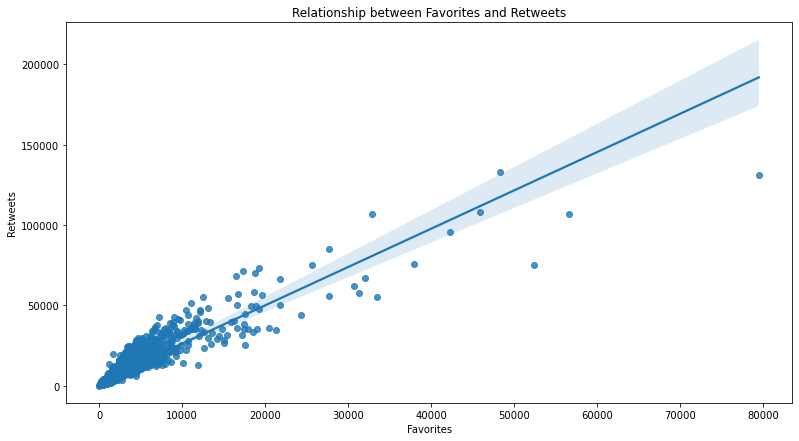

In [91]:
# Plot of Retweets against Favorite.

plt.figure(figsize=(13,7))
sns.regplot(x=data_copy.retweet_count, y=data_copy.favorite_count)
plt.title("Relationship between Favorites and Retweets")
plt.xlabel('Favorites')
plt.ylabel('Retweets');

In [92]:
# Find the top 5 dogs predicted

top_dogs = data_copy[data_copy.dog_prediction == True]
top_dogs.tweet_prediction.value_counts().head()

golden_retriever      137
labrador_retriever     94
pembroke               88
chihuahua              78
pug                    54
Name: tweet_prediction, dtype: int64

In [93]:
# Create an array from the content of the tweet i.e the "text" column
# Create an empty list for storage
# Append each word to the empty list created

tweet_content = np.array(data_copy.text)
my_list = []
for tweet in tweet_content:
    #content_list.append(tweet_content.replace("\n",""))
    my_list.append(tweet.replace("\n",""))


In [94]:
# Load libraries needed for wordcloud and images

%pip install wordcloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Note: you may need to restart the kernel to use updated packages.


In [95]:
# Load image that would be used as background for the wordcloud
# Save the list of words

mask = np.array(Image.open(requests.get(
    'https://clipartix.com/wp-content/uploads/2016/06/Dog-bone-pink-print-dog-paw-print-transparent-background-paw-print-pink-clipart.jpg', 
    stream=True).raw))
content = my_list

In [96]:
# Create a function that creates a word cloud given the background and list of words

def show_wcloud(content, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(content))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='green')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

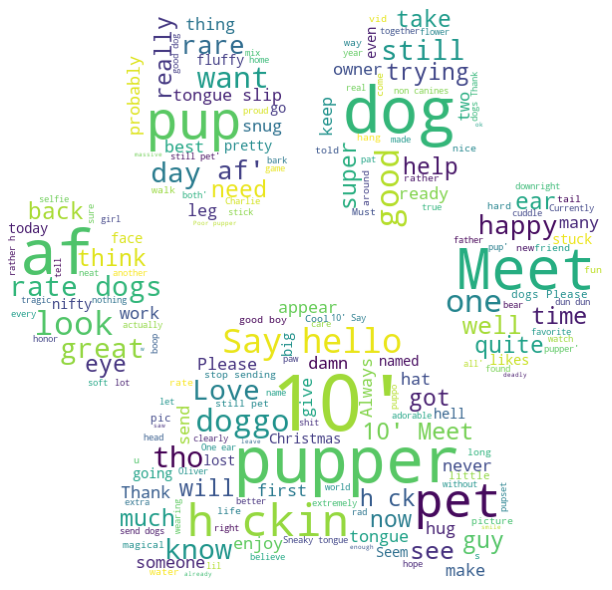

In [97]:
show_wcloud(content, mask)